In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import VarianceScaling
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
from sklearn.metrics import roc_curve,auc,precision_recall_curve,roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import collections


import matplotlib.pyplot as plt
from helper import custom_loss, filter_label, get_data, cus_accuracy

2022-05-08 13:19:49.489777: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-08 13:19:49.489804: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from mmoe_mod import mmoe_model
from ctrcvr import CTCVRNet

In [3]:
tf.config.set_soft_device_placement(False)
tf.debugging.set_log_device_placement(False)
def MTL_model(model_type,dataset, custom_path=None, epoches=5, verbose=0):
    labels_dict={"Census-income":["income_50k", "marital_stat"],"Tencent2020":["age","gender"],"Titanic":["Survived","Pclass"],"Generated":["label0","label1"]}
    labels=labels_dict[dataset]
    if custom_path:
        data=get_data(custom_path,labels=labels)        
    else:
        data=get_data("/mnt/w/6998/Project/data/"+dataset,labels=labels)
    
    if model_type=="ctrcvr":
        model=CTCVRNet()
    else:
        model=mmoe_model(data.shape[1]-2)

    
    model.train(data,labels, plot_list=["loss","accuracy","auc","pr"],epoches=epoches ,verbose=verbose)

In [ ]:
# data=get_data("/mnt/w/6998/Project/data/Generated",labels=["label0","label1"])
# model=model=mmoe_model(data.shape[1]-2)
# model.train(data,["label0","label1"], plot_list=["loss","accuracy","auc","pr"],epoches=5 ,verbose=0)

Datasets used : ['date_0.csv', 'date_1.csv']
All features we used: ['feature_7', 'feature_3', 'feature_10', 'feature_4', 'feature_5', 'feature_6', 'feature_2', 'feature_1', 'feature_8', 'feature_9'] (at most 10)


2022-05-08 13:20:07.648715: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-08 13:20:07.648745: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-08 13:20:07.648755: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-94CNSCG): /proc/driver/nvidia/version does not exist
2022-05-08 13:20:07.648903: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


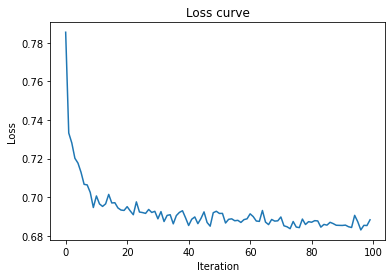

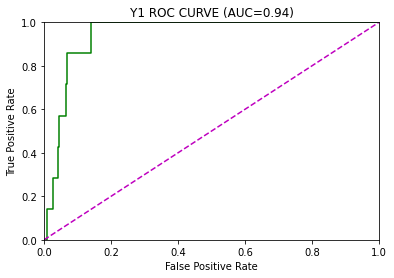

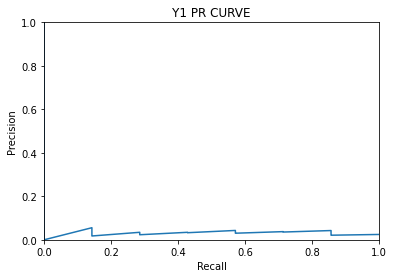

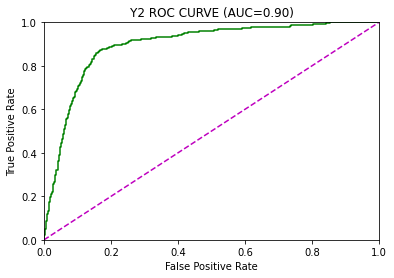

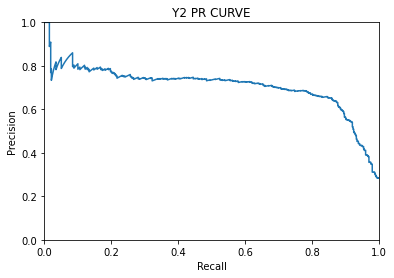

In [4]:
MTL_model("ctrcvr","Generated", epoches=100, verbose=0)

Datasets used : ['titanic.csv']
All features we used: ['Sex', 'SibSp', 'Age', 'Parch', 'Fare'] (at most 10)


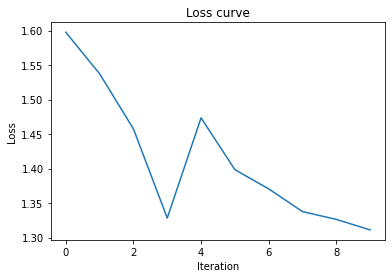

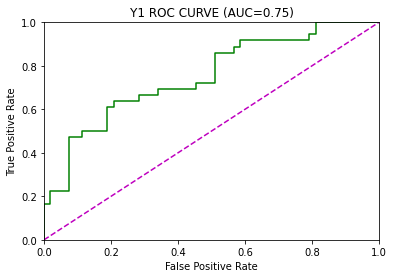

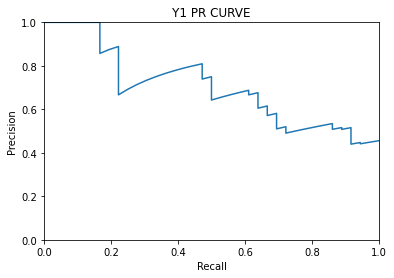

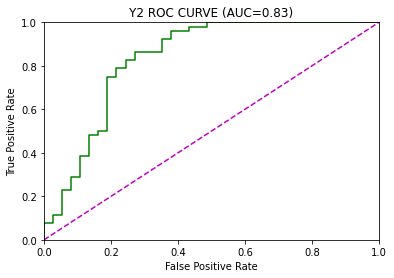

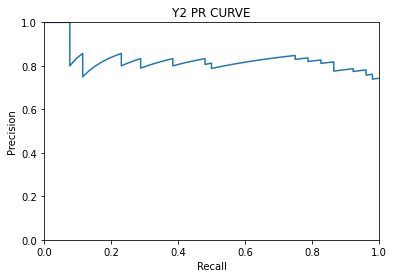

In [5]:
MTL_model("ctrcvr","Titanic", epoches=10)

Datasets used : ['census-income.csv']
All features we used: ['country_self_ Vietnam', 'full_or_part_emp_ Full-time schedules', 'det_hh_summ_ Child 18 or older', 'det_ind_code_23', 'country_self_ Ecuador', 'education_ Doctorate degree(PhD EdD)', 'country_self_ Scotland', 'full_or_part_emp_ Unemployed part- time', 'country_self_ Taiwan', 'det_hh_summ_ Child under 18 ever married'] (at most 10)


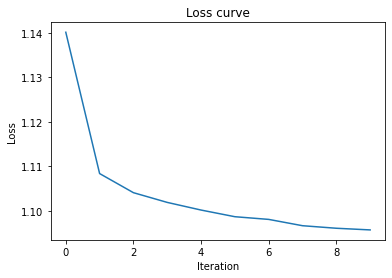

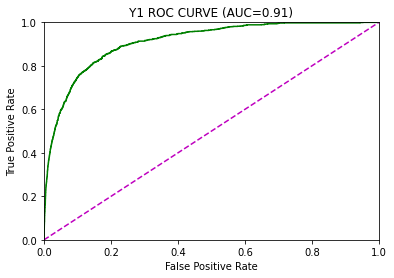

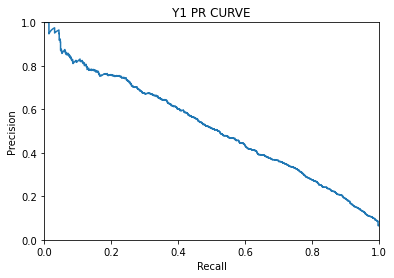

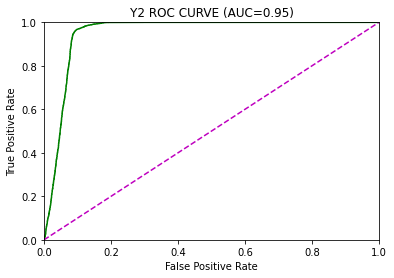

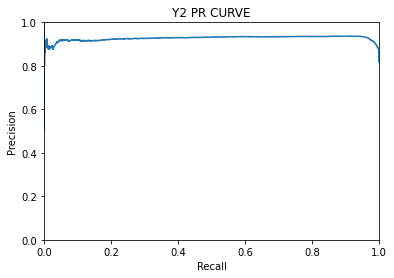

In [6]:
MTL_model("ctrcvr","Census-income", epoches=10)

Datasets used : ['click_100k_age.csv', 'click_100k_gender.csv', 'click_300k_both.csv']
All features we used: ['product_id', 'time', 'ad_id', 'click_times', 'product_category', 'creative_id', 'user_id', 'advertiser_id', 'industry'] (at most 10)


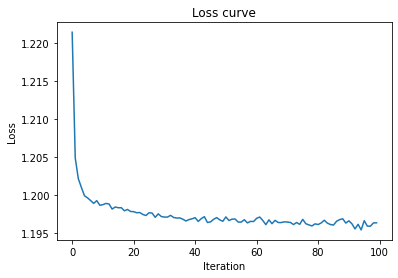

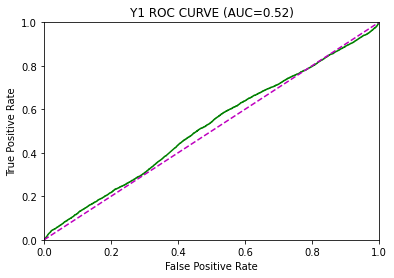

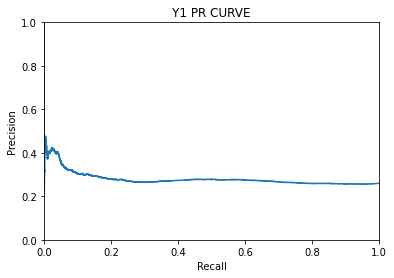

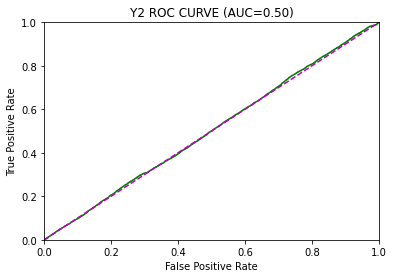

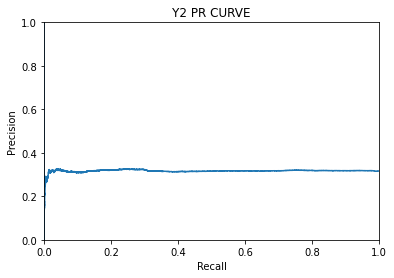

In [7]:
MTL_model("ctrcvr","Tencent2020", epoches=100)


Datasets used : ['date_0.csv', 'date_1.csv']
All features we used: ['feature_7', 'feature_3', 'feature_10', 'feature_4', 'feature_5', 'feature_6', 'feature_2', 'feature_1', 'feature_8', 'feature_9'] (at most 10)


/mnt/w/4995/e/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_33 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 m_mo_e (MMoE)                  [(None, 16),         1584        ['input_33[0][0]']               
                                 (None, 16)]                                                      
                                                                                                  
 dense_40 (Dense)               (None, 8)            136         ['m_mo_e[0][0]']                 
                                                                                                  
 dense_41 (Dense)               (None, 8)            136         ['m_mo_e[0][1]']           

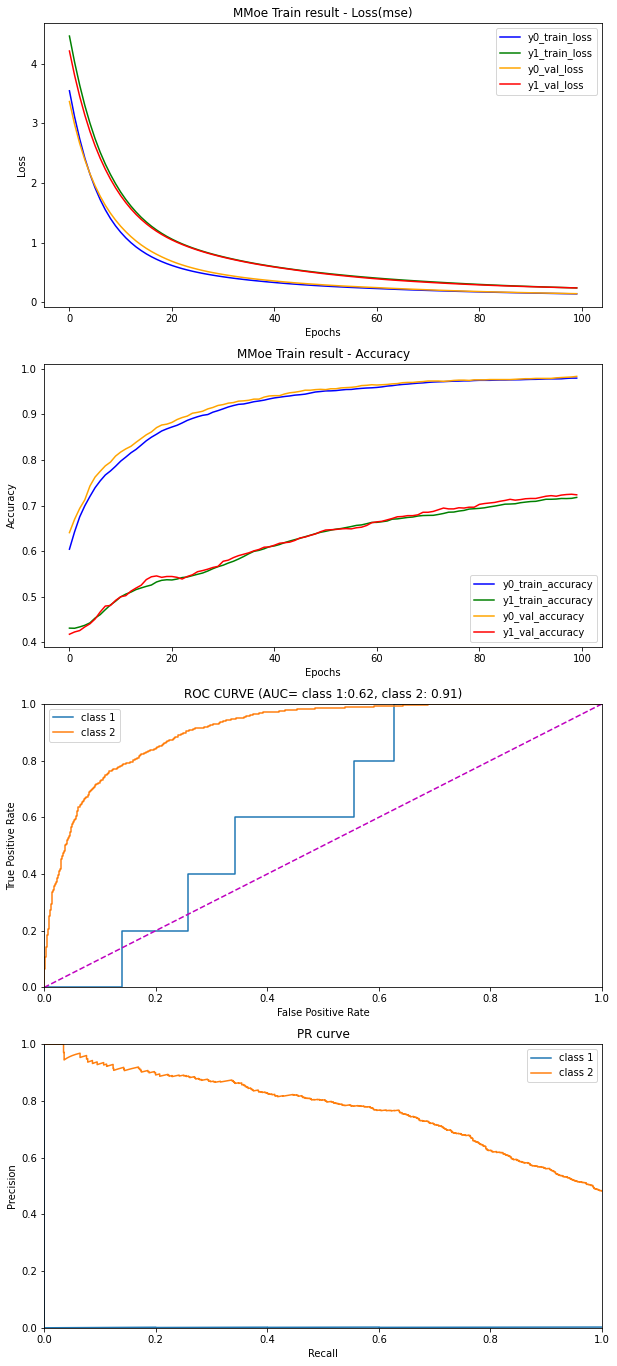


Time used to train the model:  4.28170s


In [8]:
MTL_model("mmoe","Generated", epoches=100)

Datasets used : ['census-income.csv']
All features we used: ['country_self_ Vietnam', 'full_or_part_emp_ Full-time schedules', 'det_hh_summ_ Child 18 or older', 'det_ind_code_23', 'country_self_ Ecuador', 'education_ Doctorate degree(PhD EdD)', 'country_self_ Scotland', 'full_or_part_emp_ Unemployed part- time', 'country_self_ Taiwan', 'det_hh_summ_ Child under 18 ever married'] (at most 10)


/mnt/w/4995/e/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_34 (InputLayer)          [(None, 499)]        0           []                               
                                                                                                  
 m_mo_e_1 (MMoE)                [(None, 16),         72000       ['input_34[0][0]']               
                                 (None, 16)]                                                      
                                                                                                  
 dense_42 (Dense)               (None, 8)            136         ['m_mo_e_1[0][0]']               
                                                                                                  
 dense_43 (Dense)               (None, 8)            136         ['m_mo_e_1[0][1]']         

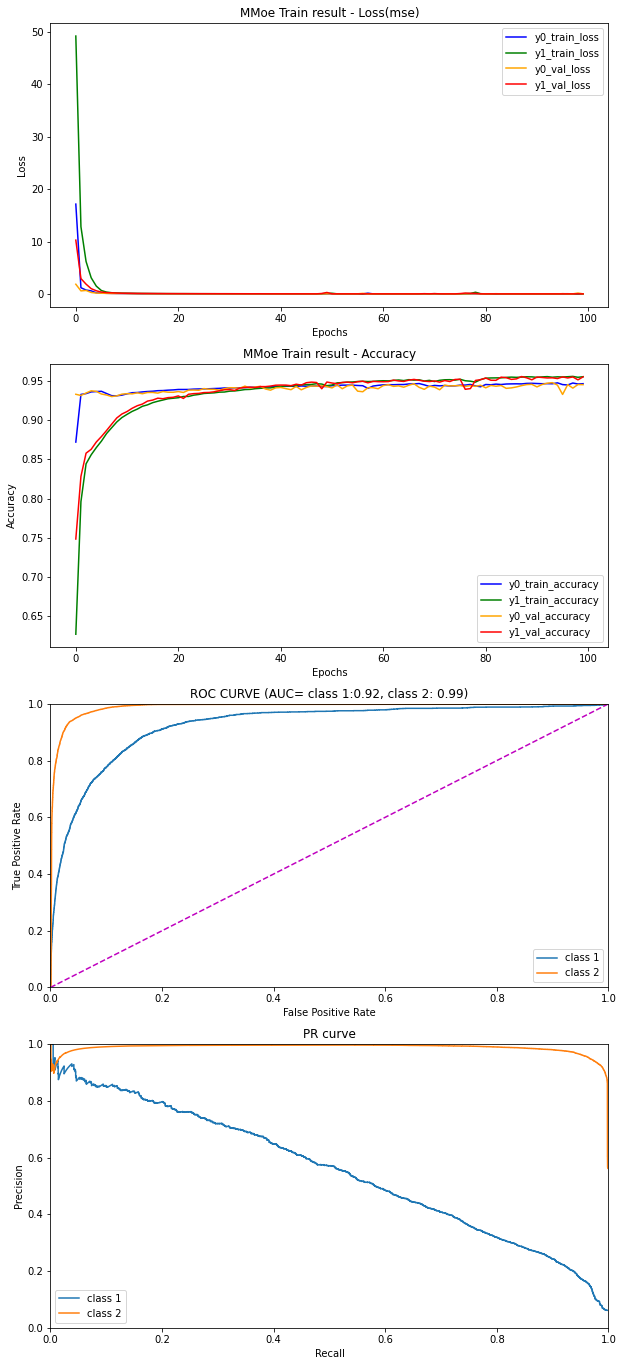


Time used to train the model:  40.60127s


In [9]:
MTL_model("mmoe","Census-income", epoches=100)

Datasets used : ['click_100k_age.csv', 'click_100k_gender.csv', 'click_300k_both.csv']
All features we used: ['product_id', 'time', 'ad_id', 'click_times', 'product_category', 'creative_id', 'user_id', 'advertiser_id', 'industry'] (at most 10)


/mnt/w/4995/e/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_40 (InputLayer)          [(None, 9)]          0           []                               
                                                                                                  
 m_mo_e_7 (MMoE)                [(None, 16),         1440        ['input_40[0][0]']               
                                 (None, 16)]                                                      
                                                                                                  
 dense_54 (Dense)               (None, 8)            136         ['m_mo_e_7[0][0]']               
                                                                                                  
 dense_55 (Dense)               (None, 8)            136         ['m_mo_e_7[0][1]']        

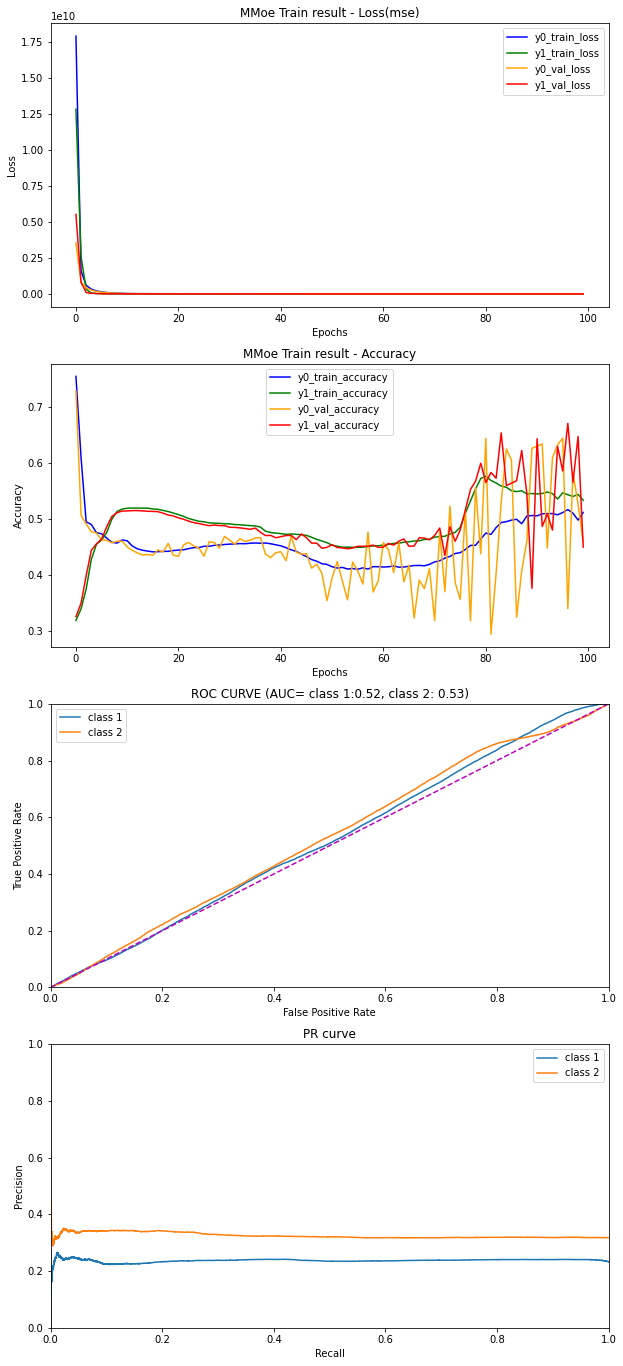


Time used to train the model:  51.17010s


In [15]:
MTL_model("mmoe","Tencent2020", epoches=100)

Datasets used : ['titanic.csv']
All features we used: ['Sex', 'SibSp', 'Age', 'Parch', 'Fare'] (at most 10)
Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_38 (InputLayer)          [(None, 5)]          0           []                               
                                                                                                  
 m_mo_e_5 (MMoE)                [(None, 16),         864         ['input_38[0][0]']               
                                 (None, 16)]                                                      
                                                                                                  
 dense_50 (Dense)               (None, 8)            136         ['m_mo_e_5[0][0]']               
                                                                                   

/mnt/w/4995/e/lib/python3.7/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Counter({0: 119, 1: 60})
Counter({1: 105, 0: 74})


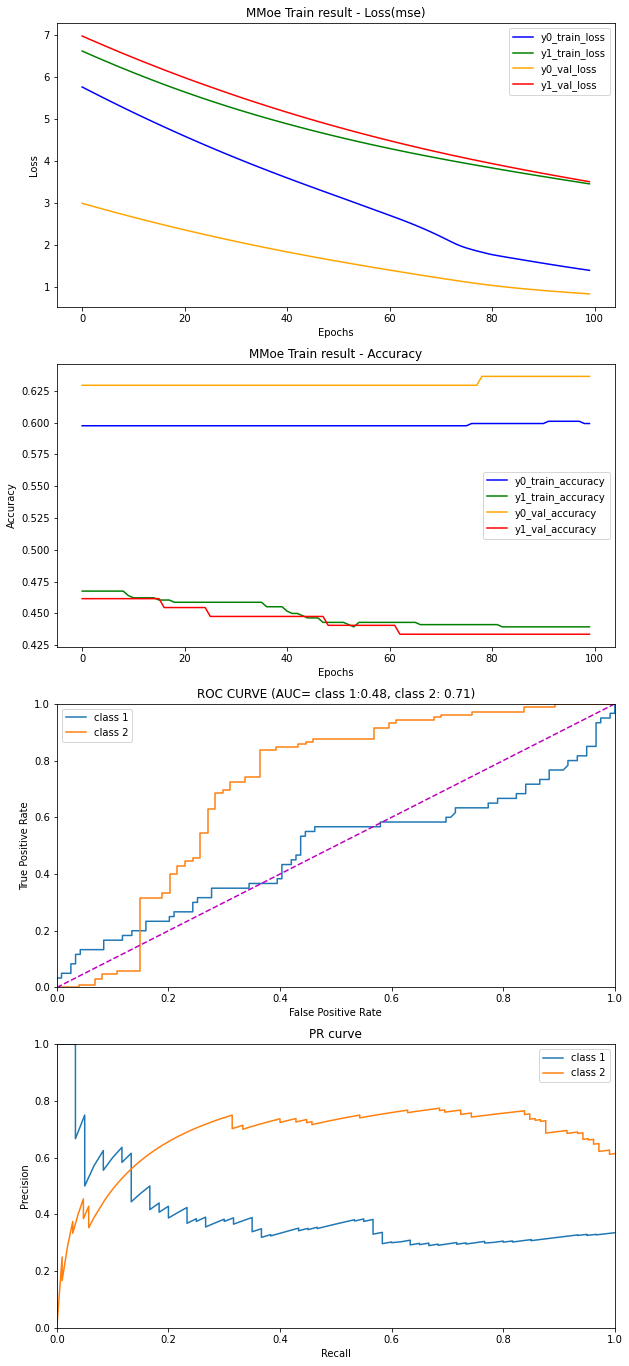


Time used to train the model:  2.30588s


In [13]:
MTL_model("mmoe","Titanic", epoches=100)